In [1]:
# This is imported for proper rendering of Latex in Notebook
from IPython.display import display, Math, Latex

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

np.random.seed(69)
plt.style.use('seaborn')

# Exploring California Housing Dataset

In this notebook we explore the California Housing dataset for regression demonstration and HPT (Hyper Parameter Tuning).

We will also list down the steps for typical dataset exploration, which can be applied broadly to any datset.

## Loading the dataset

This dataset can be fetched from `sklearn` with `fetch_california_housing` API.

In [3]:
from sklearn.datasets import fetch_california_housing

In order to analyze the dataset, let's load it as a Pandas DataFrame.

In [4]:
california_housing = fetch_california_housing(as_frame=True)
type(california_housing)

sklearn.utils.Bunch

The bunch object is a dictionary like object with the following attributes:
- `data` : pandas DataFrame (since `as_frame=True`, else np.ndarray), shape (20640, 8)
    Each row corresponding to the 8 feature values in order. If as_frame is True, data is a pandas object.
- `target` : pandas Series (sice `as_frame=True`, else np.ndarray) of shape (20640,)
    Each value corresponds to the average house value in units of 100,000. If as_frame is True, target is a pandas object.
- `feature_names` : list of length 8
    Array of ordered feature names used in the dataset.
- `DESCR` : string
    Description of the California housing dataset.
- `frame` : pandas DataFrame
    Only present when as_frame=True. DataFrame with data and target.


Each of these attributes can be accessed as `<bunch_object>.key`. In our case, we can access these features as follows:
- `california_housing.data` gives us access to contents of `data` key.
- `california_housing.target` gives us access to contents of `target` key.
- `california_housing.feature_names` gives us access to contents of `feature_names` key.
- `california_housing.DESCR` gives us access to contents of `DESCR` key.
- `california_housing.frame` gives us access to contents of `frame` key.

## Dataset Exploration

### STEP 1: Dataset description

Let's look at the description of the dataset.

In [7]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Note down the key statistics from this description such as number of examples (or samples or instances) from the description.
- There are **20640 examples** in the dataset.
- There are **8 numeric attributes** per example.
- The target label is median house value.
- There are **no missing values** in this dataset.

### STEP 2: Examine the shape of feature matrix

Number of examples and features can be obtained via `shape` of `california_housing.data`.

In [8]:
california_housing.data.shape

(20640, 8)

There are 20640 examples with 8 features as mentioned in the description.

In [9]:
type(california_housing.data)

pandas.core.frame.DataFrame

### STEP 3: Examine shape of the label

Let's look at the shape of label vector/matrix.

In [10]:
california_housing.target.shape

(20640,)

Target contains 20640 labels - one each example.

In [11]:
type(california_housing.target)

pandas.core.series.Series

### STEP 4: Feature names

Let's find out the names of the attributes.

In [12]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Note the attributes and their description, which is a key step in understanding the data.

- MedInc - median income in block
- HouseAge - median house age in block
- AveRooms - average number of rooms
- AveBedrms - average number of bedrooms
- Population - block population
- AveOccup - average house occupancy
- Latitude - house block latitude
- Longitude - house block longitude

### STEP 5: Examing sample training examples

Let's look at a few training examples along with labels.

In [13]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


This dataset contains aggregated data about each district in California.

### STEP 6: Examine features

Let's look at the features.

In [14]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We have information about
- Demography of each district (income, population, house occupancy),
- Location of the districts (latitude and longitude) and
- Characteristics of houses in the district (#rooms, #bedrooms, age of house)

Since, the information is aggregated at the district levels, the features corresponds to averages or median.

### STEP 7: Examine target

Let's look at the target to be predicted.

In [15]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target contains the median of the house values for each district. Since target is a real number, this is a regression problem.

### STEP 8: Examine details of features and labels

Let's look at the details of features and target labels.

In [16]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We observe that:
- The dataset contains 20640 examples with 8 features.
- All features are numerical features encoded as floating point numbers.
- There are no missing values in any features - the `Non-Null` is equal to the no. of examples in the training set.

### STEP 9: Feature and target histograms

Let's look at the distribution of these features and targets by plotting their histograms.

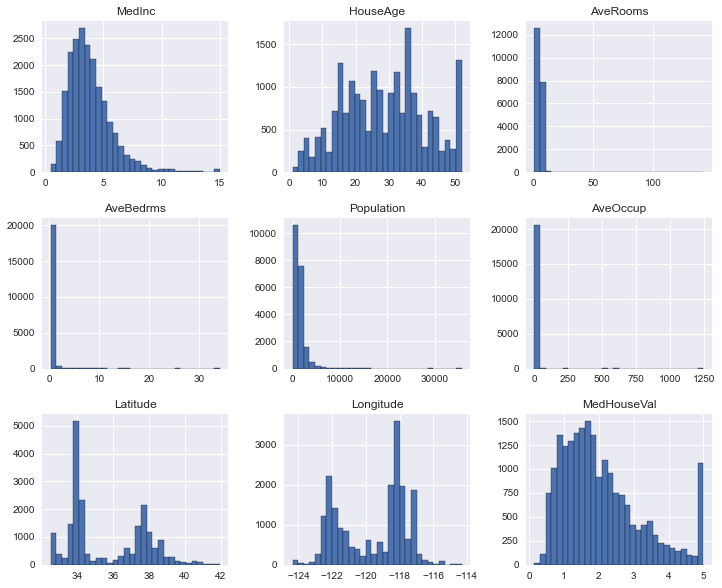

In [25]:
california_housing.frame.hist(figsize=(12,10), bins=30, edgecolor = 'black')
plt.subplots_adjust()
plt.show()

Let's observe these histograms and note down our findings:
- **MedInc** has a long tail distribution - salary of people is more or less normally distributed with few folks getting high salary.
- **HousAge** has more or less a uniform distribution.
- The range of features, **AveRooms**, **AveBedrms**, **AveOccups**, **Population**, is large and it contains a small number of large values (as these are unnoticeable bins on the right of the histogram plots of these features). That would mean that there could be certain outlier values present in these features.
- **Latitude** and **Logitude** carry geographical information. Their combination can help us decide the price of the house.
- **MedHouseVal** also has a long tail distribution. It spiked towards the end. The reason is that the houses with prices more than 5 are given the value 5.

### STEP 10: Feature and target statistics

Let's look at the statistics of these features and target.

In [5]:
california_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


We can observe that there is a large difference between `75%` and `max` values of `AveRooms`, `AveBedrms`, `Population` and `AveOccup`- which confirms our intuition about the presence of outliers or extreme values in these features.

### STEP 11: Pairplot

<Figure size 576x396 with 0 Axes>

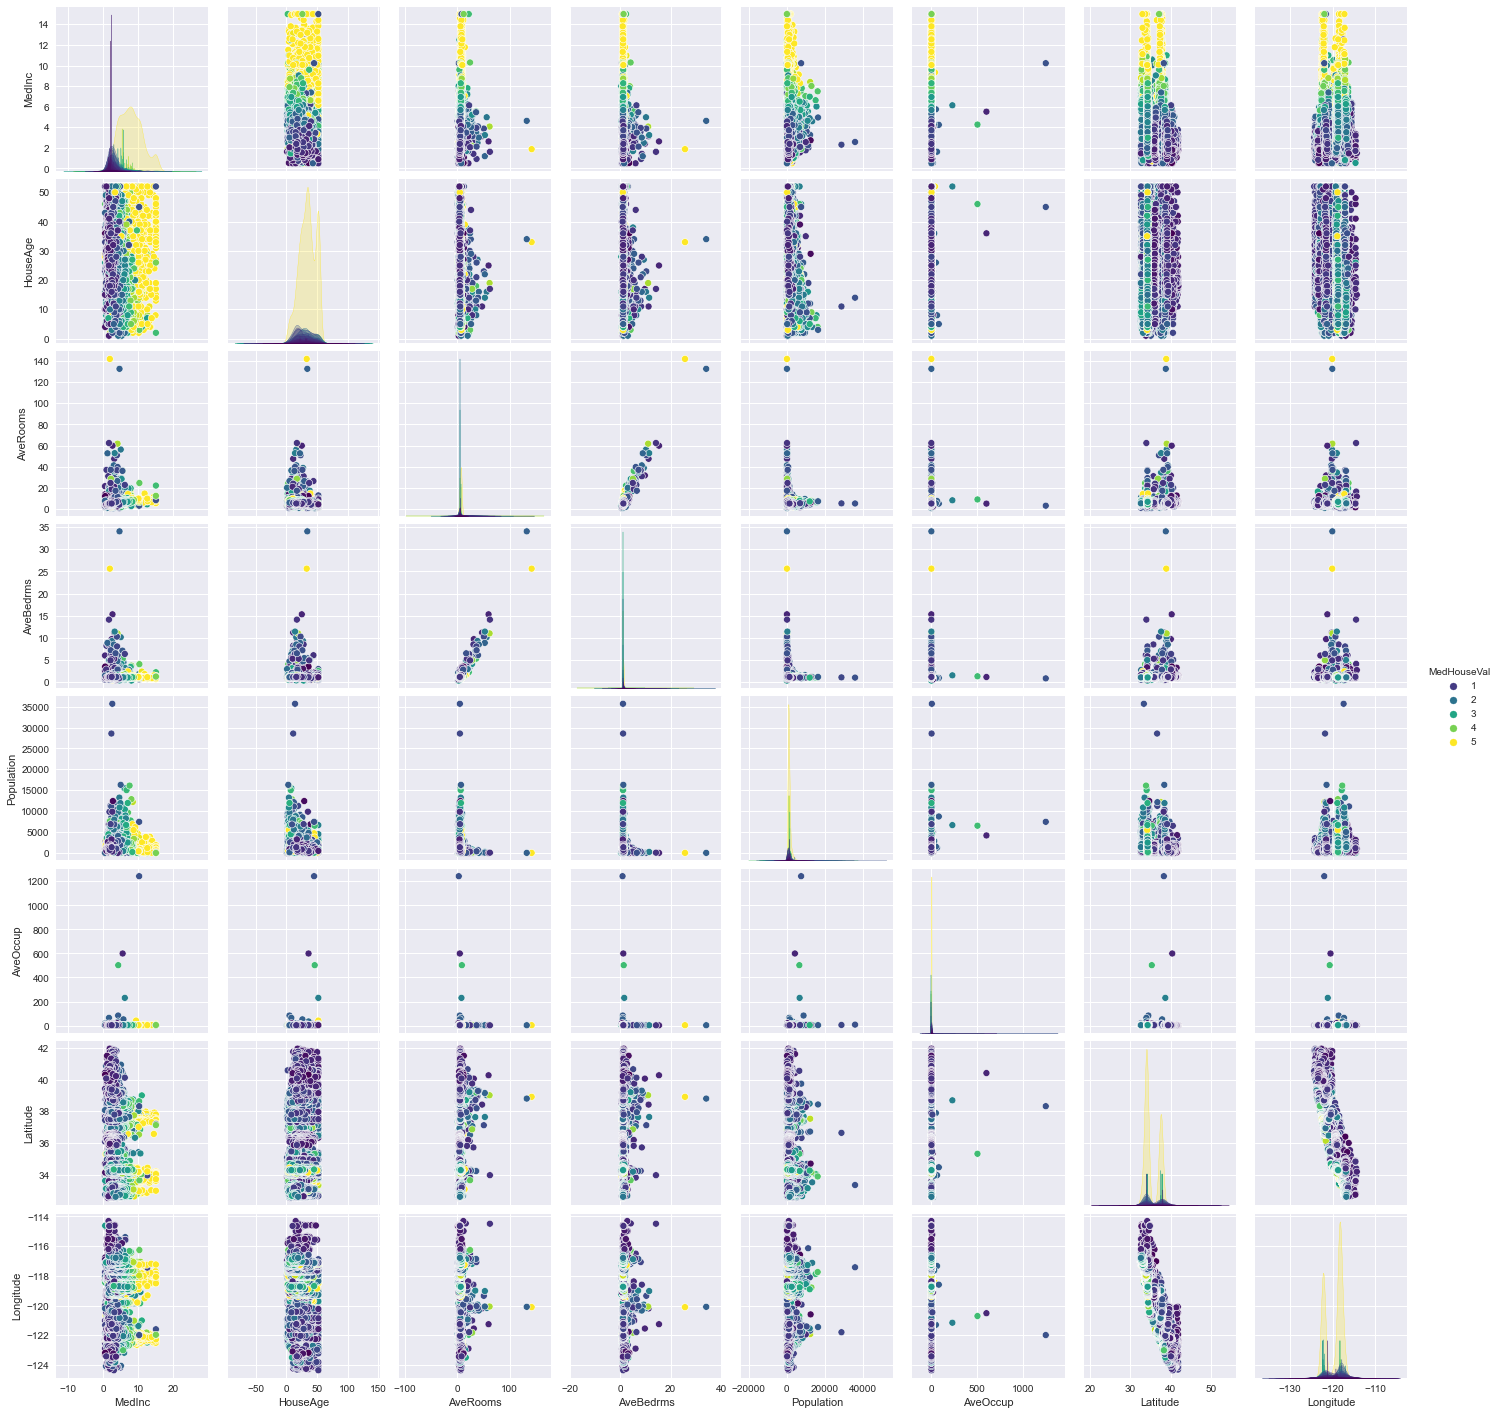

In [7]:
plt.figure()
sns.pairplot(data=california_housing.frame, hue='MedHouseVal', palette='viridis')
plt.show()

A few observations based on pairplot:
- `MedIncome` seems to be useful in distinguishing between low and high valued houses.
- A few features have extreme values.
- Latitude and longitude together seem to distinguish between low and high valued houses.

## Summary

- Explored California Housing Dataset (which we will use later in Linear/Polynomial Regression).
- Examined various statistics of datastes - #samples, #labels.
- Examined distribution of features through histogram and pairplots.